In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

In [28]:
q1 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/qsos1.csv")
q2 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/gals3r100.csv")
q3 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/qsovali.csv")
q4 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/galvali.csv")

In [29]:
q1.head()

,gw1,rw1,iw1,zw1,yw1,w12,ipk,zpk,w23,ra,dec,class
0,0.1291,0.0442,0.0763,-0.1097,-0.0390,0.645,-0.0798,-0.1306,1.347,130.182022,35.254021,QSO
1,1.1357,1.1314,1.1898,1.2547,1.0329,0.314,-0.1875,0.1815,0.872,211.456385,39.662792,QSO
2,0.6357,0.5618,0.5277,0.1935,0.2482,0.275,-0.0891,-0.0772,1.150,154.642487,55.115891,QSO
3,2.2020,2.1002,2.0227,2.0110,1.4642,0.564,-0.0226,0.0504,1.303,355.534149,14.697548,QSO
4,0.7686,0.7570,0.5810,0.7206,0.5224,0.732,-0.0889,-0.1298,1.017,145.067429,16.637278,QSO


In [58]:
#下采样
def lower_sample_data(df, percent=100):#percent:多数类别下采样的数量相对于少数类别样本数量的比例
    index = np.random.randint(len(q2), size=percent * (len(df) - len(q2)))
    lower_data1 = data1.iloc[list(index)]
    return(lower_data1)

In [59]:
lower_q2 = lower_sample_data(q2)
data1 = pd.concat([q1, lower_q2, ignore_index = True)
#merge q1 and q2#
data2 = pd.concat([q3, q4], ignore_index = True)
#merge q3 and q4#

SyntaxError: invalid syntax (<ipython-input-59-91a8d7ab83e7>, line 2)

In [37]:
data1.head()

,gw1,rw1,iw1,zw1,yw1,w12,ipk,zpk,w23,ra,dec,class
0,0.1291,0.0442,0.0763,-0.1097,-0.0390,0.645,-0.0798,-0.1306,1.347,130.182022,35.254021,QSO
1,1.1357,1.1314,1.1898,1.2547,1.0329,0.314,-0.1875,0.1815,0.872,211.456385,39.662792,QSO
2,0.6357,0.5618,0.5277,0.1935,0.2482,0.275,-0.0891,-0.0772,1.150,154.642487,55.115891,QSO
3,2.2020,2.1002,2.0227,2.0110,1.4642,0.564,-0.0226,0.0504,1.303,355.534149,14.697548,QSO
4,0.7686,0.7570,0.5810,0.7206,0.5224,0.732,-0.0889,-0.1298,1.017,145.067429,16.637278,QSO


In [38]:
target_names=np.array(['QSO','STAR'])

In [39]:
train = data1
test = data2

In [40]:
train.sort_index(inplace=True)
test.sort_index(inplace=True)

In [41]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 10000
Number of observations in the test data: 20000


In [42]:
# Create a list of the feature column's names
features = train.columns[:8]

# View features
features

Index(['gw1', 'rw1', 'iw1', 'zw1', 'yw1', 'w12', 'ipk', 'zpk'], dtype='object')

In [43]:
pd.factorize(train['class'])

(array([0, 0, 0, ..., 0, 0, 0]), Index(['QSO'], dtype='object'))

In [44]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['class'])[0]

# View target
y

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
train['class']

0       QSO
1       QSO
2       QSO
3       QSO
4       QSO
5       QSO
6       QSO
7       QSO
8       QSO
9       QSO
10      QSO
11      QSO
12      QSO
13      QSO
14      QSO
15      QSO
16      QSO
17      QSO
18      QSO
19      QSO
20      QSO
21      QSO
22      QSO
23      QSO
24      QSO
25      QSO
26      QSO
27      QSO
28      QSO
29      QSO
       ... 
9970    QSO
9971    QSO
9972    QSO
9973    QSO
9974    QSO
9975    QSO
9976    QSO
9977    QSO
9978    QSO
9979    QSO
9980    QSO
9981    QSO
9982    QSO
9983    QSO
9984    QSO
9985    QSO
9986    QSO
9987    QSO
9988    QSO
9989    QSO
9990    QSO
9991    QSO
9992    QSO
9993    QSO
9994    QSO
9995    QSO
9996    QSO
9997    QSO
9998    QSO
9999    QSO
Name: class, Length: 10000, dtype: object

In [46]:
clf = RandomForestClassifier(n_estimators=100, 
#                              max_features=1,
#                              max_depth=1,
                             n_jobs=8,
#并行处理的几何数
                             random_state=15,
                             #随机数种子
                             class_weight="balanced"
#                              ,
#                              class_weight={0:1,1:20,2:5}
                            )
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=8, oob_score=False, random_state=15,
            verbose=0, warm_start=False)

In [47]:
y_test = pd.factorize(test['class'])[0]
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [48]:
y_pred = clf.predict_proba(test[features])

#y_pred

In [49]:
#range(len(y_pred))

In [50]:
#y_scores = np.array([y_pred[i][0] if y_test[i]==0 else y_pred[i][1] for i in range(len(y_pred))])
#y_scores

IndexError: index 1 is out of bounds for axis 0 with size 1

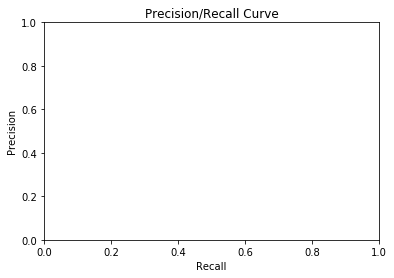

In [51]:
plt.figure("P-R Curve")
plt.title('Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

precision, recall, thresholds = precision_recall_curve(y_test, y_pred.transpose()[1])
plt.plot(recall,precision)
plt.show()

In [52]:
scores=cross_val_score(clf,train[features],y,cv=5)
print("交叉验证准确率：",scores)

交叉验证准确率： [1. 1. 1. 1. 1.]


In [53]:
# Create actual english names for the plants for each predicted plant class
preds = target_names[clf.predict(test[features])]
# Create confusion matrix
pd.crosstab(test['class'], preds, rownames=['Actual classes'], colnames=['Predicted classes'])

Predicted classes,QSO
Actual classes,
GALAXY,10000
QSO,10000


In [54]:
test['preds'] = preds
preds

array(['QSO', 'QSO', 'QSO', ..., 'QSO', 'QSO', 'QSO'], dtype='<U4')

In [55]:
len(test[(test['preds']=='QSO')&(test['class']=='QSO')])

10000

In [26]:
len(test[(test['preds']=='STAR')&(test['class']=='STAR')])

0